# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [2]:
import requests

In [3]:
url = 'http://api.hm.com/v2/us/en/products/display?categories=sale&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'
response = requests.get(url)

In [4]:
data = response.json()
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

### What is the tag name and class name for the old price? The new price?

In [5]:
# new price =>   <span class="price">$5</span> 
# old price =>   <span class="old-price">$12.99</span> 

### What is the tag name and class name for the link to the product page?

In [6]:
# link to product page => <a href="http://www.hm.com/us/product/60133?article=60133-B" class="product-url js-product-tracking" data-ticket-id="Oy9wcm9kdWN0LWxpc3RpbmdzLXVzaW5nLWRwbi9wcm9kdWN0LWxpc3Qtd2l0aC1jb3VudC9wcm9kdWN0LWxpc3Qtd2l0aC1jb3VudC9wcm9kdWN0LWxpc3Q7Iztwcm9kdWN0X2tleTs2MDEzMy01X2VuX1VTOzYwMTMzLUJfZW5fVVM7O05PTkU6Tk9ORTszMTs"></a>

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [7]:
#This is an API

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [8]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [31]:
len(data['displayArticles'])


60

In [10]:
len(data['displayArticles'][0]['name'])

10

## URLs

### What is the URL for data about on-sale men's clothing?

In [11]:
### one link is taken from categories?path, the other is taken from display?categories 

#http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP
#http://api.hm.com/v2/us/en/products/categories?path=sale/men&deviceType=DESKTOP

### What is the URL for data about on-sale women's clothing?

In [12]:
#http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP
#http://api.hm.com/v2/us/en/products/categories?path=sale/ladies&deviceType=DESKTOP

### What is the URL for data about on-sale women's tops?

In [13]:
#http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP
#http://api.hm.com/v2/us/en/products/categories?path=sale/ladies/tops&deviceType=DESKTOP

### What changes about the url based on what you're looking for?

In [14]:
#http://api.hm.com/v2/us/en/products/display?categories=sale% +++ 2Fladies%2Ftops&concealCategories=true +++ &pageSize=60&page=1&deviceType=DESKTOP
#http://api.hm.com/v2/us/en/products/categories?path=sale +++ /ladies/tops +++ &deviceType=DESKTOP

## Request on-sale women's tops.

### How many results do you get?

In [37]:
import requests
url3 = 'http://api.hm.com/v2/us/en/products/categories?path=sale/ladies/tops&deviceType=DESKTOP'
%matplotlib inline

In [16]:
response = requests.get(url3)
data3 = response.json()
data3.keys()
len(data3['categories'])

5

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [17]:
import requests
url2 = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'
response = requests.get(url2)

In [18]:
data1 = response.json()
data1.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [19]:
len(data1['displayArticles']) # there are 60 results for it 

60

In [20]:
url_150 = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=150&page=1&deviceType=DESKTOP'
response = requests.get(url_150)
# replace the concerned part in the API (60 => 150)
data5 = response.json()

len(data5['displayArticles']) # there are 150 result for it 

150

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [21]:
url_csv = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=400&page=1&deviceType=DESKTOP'
response = requests.get(url_csv)
women_tops = response.json()
len(women_tops['displayArticles'])
# 359 items in total on this link 

359

In [32]:
women_list = women_tops['displayArticles']

tops_sale = []

for piece in women_list:
    current = {}
    current['Name'] = piece['name']
    current['Product Code'] = piece['articleCode']   
    current['Old Price'] = piece['priceInfo']['formattedOldPrice']
    current['New Price'] = piece['priceInfo']['formattedPrice']
    current['Web Url'] = piece['webUrl']
    tops_sale.append(current)
print(tops_sale)

[{'Name': 'Short-sleeved Top', 'Product Code': '65274-B', 'Old Price': '$9.99', 'New Price': '$6.99', 'Web Url': 'http://www.hm.com/us/product/65274?article=65274-B'}, {'Name': 'Short-sleeved Top', 'Product Code': '65274-A', 'Old Price': '$9.99', 'New Price': '$6.99', 'Web Url': 'http://www.hm.com/us/product/65274?article=65274-A'}, {'Name': 'Short-sleeved Top', 'Product Code': '65274-F', 'Old Price': '$9.99', 'New Price': '$6.99', 'Web Url': 'http://www.hm.com/us/product/65274?article=65274-F'}, {'Name': 'Short-sleeved Top', 'Product Code': '65274-E', 'Old Price': '$9.99', 'New Price': '$6.99', 'Web Url': 'http://www.hm.com/us/product/65274?article=65274-E'}, {'Name': 'Jersey Top', 'Product Code': '60133-E', 'Old Price': '$12.99', 'New Price': '$5', 'Web Url': 'http://www.hm.com/us/product/60133?article=60133-E'}, {'Name': 'Jersey Top', 'Product Code': '60133-F', 'Old Price': '$12.99', 'New Price': '$5', 'Web Url': 'http://www.hm.com/us/product/60133?article=60133-F'}, {'Name': 'Jerse

In [23]:
import pandas as pd 

In [24]:
df = pd.DataFrame(tops_sale) #importing to a csv file it always has to be a list of dictionaries
df.to_csv('tops_sale.csv', index = False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [25]:
df

,Name,New Price,Old Price,Product Code,Web Url
0,Short-sleeved Top,$6.99,$9.99,65274-B,http://www.hm.com/us/product/65274?article=652...
1,Short-sleeved Top,$6.99,$9.99,65274-A,http://www.hm.com/us/product/65274?article=652...
2,Short-sleeved Top,$6.99,$9.99,65274-F,http://www.hm.com/us/product/65274?article=652...
3,Short-sleeved Top,$6.99,$9.99,65274-E,http://www.hm.com/us/product/65274?article=652...
4,Jersey Top,$5,$12.99,60133-E,http://www.hm.com/us/product/60133?article=601...
5,Jersey Top,$5,$12.99,60133-F,http://www.hm.com/us/product/60133?article=601...
6,Jersey Top,$5,$12.99,60133-B,http://www.hm.com/us/product/60133?article=601...
7,Jersey Top,$5.99,$12.99,68934-C,http://www.hm.com/us/product/68934?article=689...
8,Crêped Camisole Top,$7,$17.99,65300-B,http://www.hm.com/us/product/65300?article=653...
9,Jersey Top,$5.99,$12.99,68934-A,http://www.hm.com/us/product/68934?article=689...


### Convert the prices to numbers, if you haven't already

In [26]:
df['Old Price'] = df['Old Price'].str.replace('$', '')
df['New Price'] = df['New Price'].str.replace('$', '')

In [27]:
df

,Name,New Price,Old Price,Product Code,Web Url
0,Short-sleeved Top,6.99,9.99,65274-B,http://www.hm.com/us/product/65274?article=652...
1,Short-sleeved Top,6.99,9.99,65274-A,http://www.hm.com/us/product/65274?article=652...
2,Short-sleeved Top,6.99,9.99,65274-F,http://www.hm.com/us/product/65274?article=652...
3,Short-sleeved Top,6.99,9.99,65274-E,http://www.hm.com/us/product/65274?article=652...
4,Jersey Top,5,12.99,60133-E,http://www.hm.com/us/product/60133?article=601...
5,Jersey Top,5,12.99,60133-F,http://www.hm.com/us/product/60133?article=601...
6,Jersey Top,5,12.99,60133-B,http://www.hm.com/us/product/60133?article=601...
7,Jersey Top,5.99,12.99,68934-C,http://www.hm.com/us/product/68934?article=689...
8,Crêped Camisole Top,7,17.99,65300-B,http://www.hm.com/us/product/65300?article=653...
9,Jersey Top,5.99,12.99,68934-A,http://www.hm.com/us/product/68934?article=689...


### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [28]:
import statistics
df['New Price'].astype(float).mean()

11.163064066852368

In [29]:
df['Old Price'].astype(float).mean()

19.713788300835649

### What is the average discount between full price and on sale? Histogram too, please.

8.55072423398


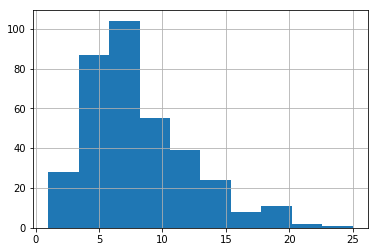

In [38]:
discount = df['Old Price'].astype(float) - df['New Price'].astype(float)
print(discount.mean())
discount.hist()

### What is the average discount as a percentage of the full price? Histogram too, please.

42.6379929522


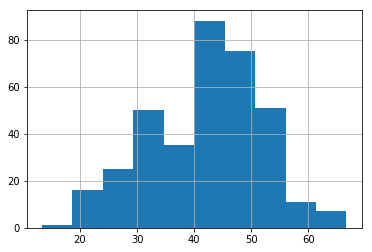

In [39]:
discount_percentage = discount / df['Old Price'].astype(float) * 100
print(discount_percentage.mean())
discount_percentage.hist()

## Shopping the sales

### How many items are over 50% off?


In [43]:
df['discount_percentage'] = discount_percentage
df.head()

,Name,New Price,Old Price,Product Code,Web Url,discount_percentage
0,Short-sleeved Top,6.99,9.99,65274-B,http://www.hm.com/us/product/65274?article=652...,30.030030
1,Short-sleeved Top,6.99,9.99,65274-A,http://www.hm.com/us/product/65274?article=652...,30.030030
2,Short-sleeved Top,6.99,9.99,65274-F,http://www.hm.com/us/product/65274?article=652...,30.030030
3,Short-sleeved Top,6.99,9.99,65274-E,http://www.hm.com/us/product/65274?article=652...,30.030030
4,Jersey Top,5,12.99,60133-E,http://www.hm.com/us/product/60133?article=601...,61.508853


In [48]:
over_50 = df['discount_percentage'] >= 50
df[over_50].shape

(92, 6)

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [49]:
df[over_50]

,Name,New Price,Old Price,Product Code,Web Url,discount_percentage
4,Jersey Top,5,12.99,60133-E,http://www.hm.com/us/product/60133?article=601...,61.508853
5,Jersey Top,5,12.99,60133-F,http://www.hm.com/us/product/60133?article=601...,61.508853
6,Jersey Top,5,12.99,60133-B,http://www.hm.com/us/product/60133?article=601...,61.508853
7,Jersey Top,5.99,12.99,68934-C,http://www.hm.com/us/product/68934?article=689...,53.887606
8,Crêped Camisole Top,7,17.99,65300-B,http://www.hm.com/us/product/65300?article=653...,61.089494
9,Jersey Top,5.99,12.99,68934-A,http://www.hm.com/us/product/68934?article=689...,53.887606
10,Crêped Camisole Top,7,17.99,65300-A,http://www.hm.com/us/product/65300?article=653...,61.089494
11,Crêped Camisole Top,7,17.99,65300-C,http://www.hm.com/us/product/65300?article=653...,61.089494
12,T-shirt with Printed Design,5.99,12.99,63019-K,http://www.hm.com/us/product/63019?article=630...,53.887606
13,T-shirt with Printed Design,5.99,12.99,63019-Q,http://www.hm.com/us/product/63019?article=630...,53.887606
